In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
from sklearn.preprocessing import StandardScaler

In [19]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [20]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [21]:
df_final = pd.concat([df_nums,df_objs],axis=1)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_E        53940 non-null  uint8  
 12  color_F        53940 non-null  uint8  
 13  color_G        53940 non-null  uint8  
 14  color_H        53940 non-null  uint8  
 15  color_I        53940 non-null  uint8  
 16  color_J        53940 non-null  uint8  
 17  clarity_IF     53940 non-null  uint8  
 18  clarit

In [25]:
df_final.corr()['price'].sort_values(ascending=False)

price            1.000000
carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64

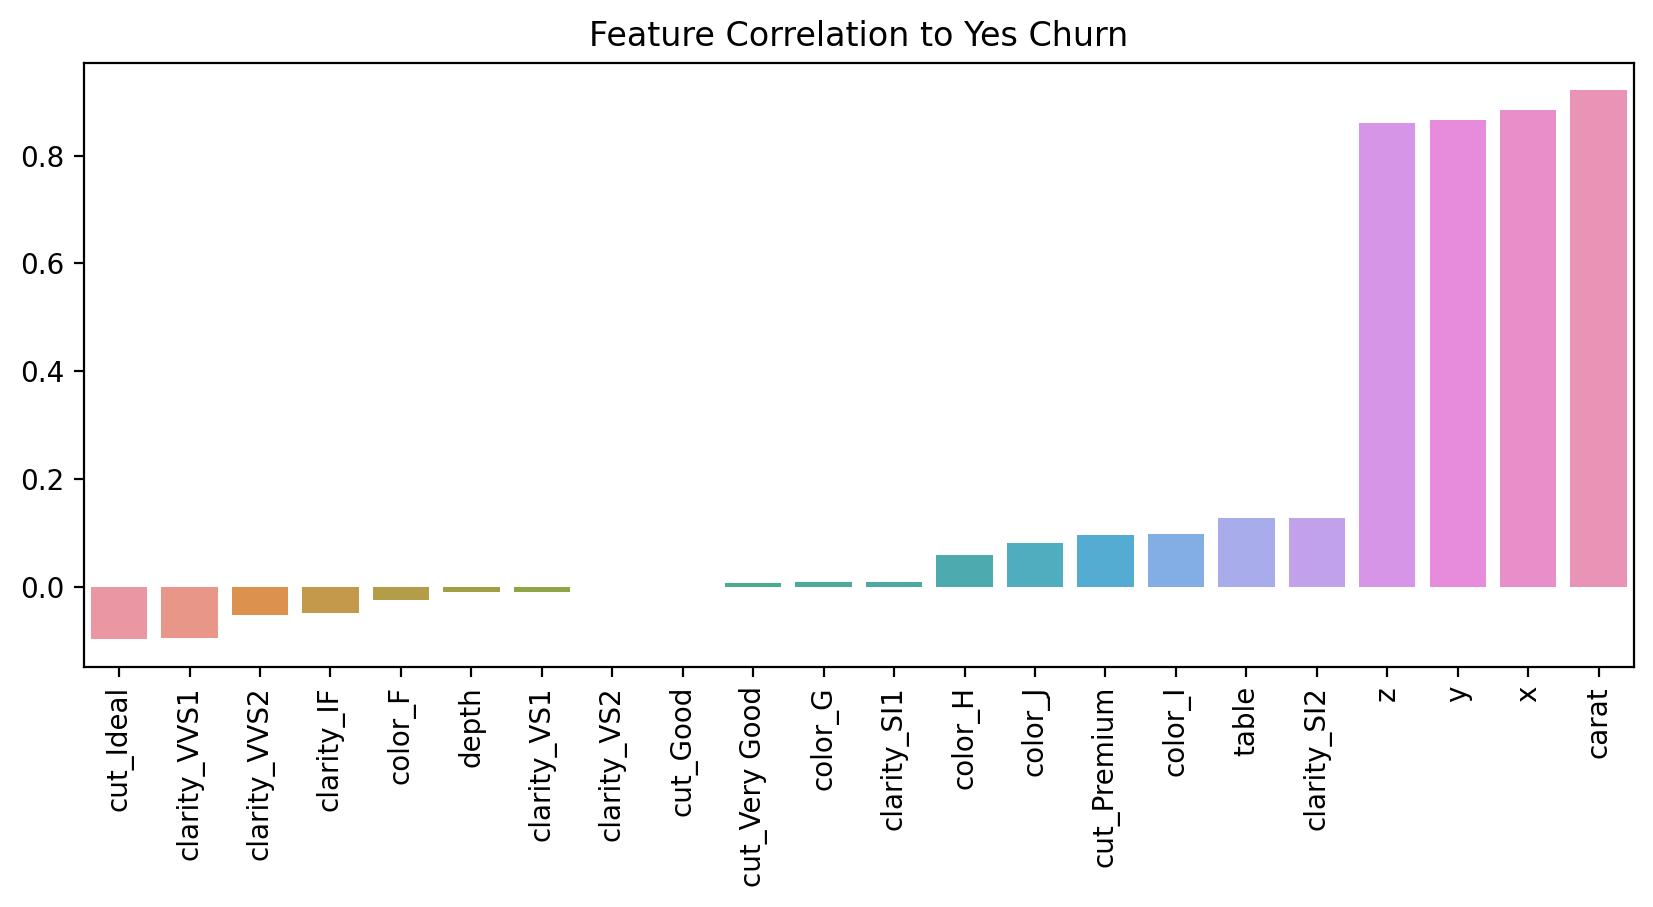

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=df_final.corr()['price'].sort_values().iloc[1:-1].index,y=df_final.corr()['price'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

(0.0, 6.0)

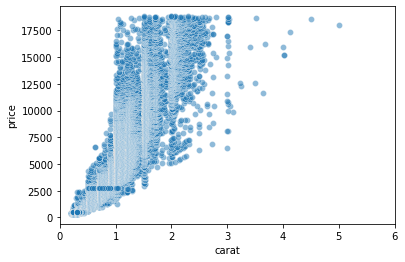

In [48]:
sns.scatterplot(x=df['carat'],y=df['price'],alpha=0.5)
plt.xlim(0,6)

In [49]:
df_nums['volume']= df['x']*df['y']*df['z']

In [50]:
df_nums.head()

,carat,depth,table,price,x,y,z,volume
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [51]:
df_final = pd.concat([df_nums,df_objs],axis=1)

In [54]:
df_final.corr()['price'].sort_values(ascending=False)

price            1.000000
carat            0.921591
volume           0.902385
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64

In [55]:
df_final=df_final.drop(['x','y','z'],axis=1)

In [57]:
df_final.corr()['price'].sort_values(ascending=False)

price            1.000000
carat            0.921591
volume           0.902385
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64

In [58]:
scaler= StandardScaler()

In [59]:
X=df_final.drop('price',axis=1)
y=df_final['price']

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [64]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model= LinearRegression()

In [67]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [68]:
test_predictions= model.predict(scaled_X_test)

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [71]:
MAE

814.9599330918867

In [72]:
RMSE

1191.9476790937547

In [73]:
#Residuals

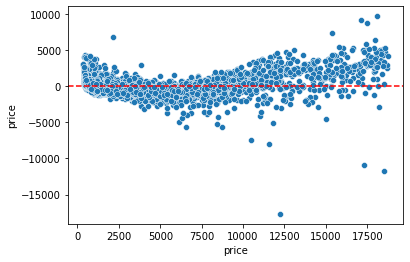

In [74]:
test_res= y_test-test_predictions
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

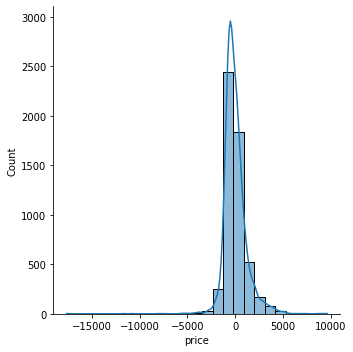

In [75]:
sns.displot(test_res,bins=25,kde=True)

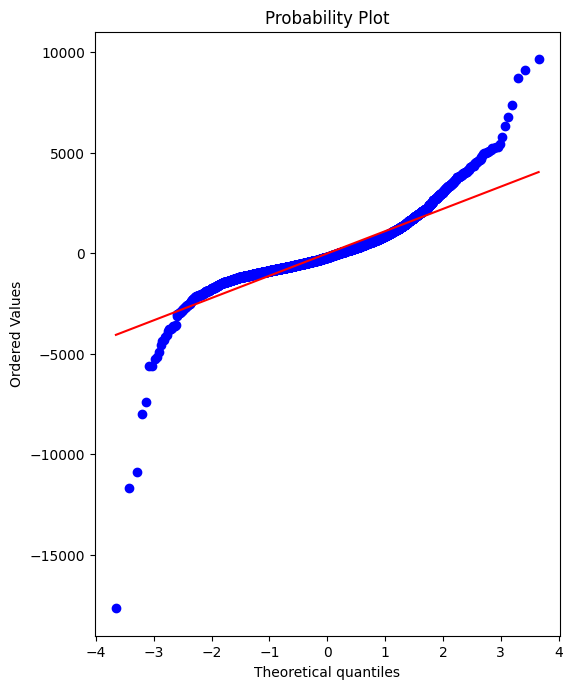

In [76]:
import scipy as sp


# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)



In [77]:
model.coef_

array([3857.9148858 ,  -18.27602812,  -49.13267687,  367.56861592,
        176.90535738,  428.07073656,  351.91165826,  323.49938818,
        -83.03447203, -118.59708156, -210.29222489, -357.56181392,
       -434.08206906, -524.9454431 ,  974.17159582, 1545.01110228,
        998.04819528, 1643.88624544, 1783.10691262, 1283.09964801,
       1459.15044876])